# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `Team 7`
* Students: `Mathieu Lamiot, Julien Heitmann, Louis Landelle, Mathias Goncalves`
* Dataset: `US Senators`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

In [4]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [208]:
adjacency =  np.sign(np.load("adjacency.npy"))
n_nodes =  adjacency.shape[0]
n_edges =  int(np.sum(adjacency)/2)

(array([ 1.,  2.,  0.,  0.,  1.,  0.,  1.,  3., 35., 57.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <a list of 10 Patch objects>)

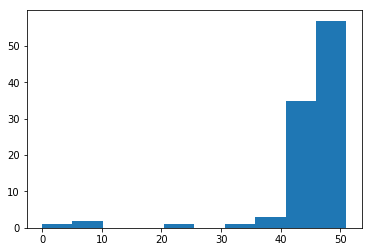

In [6]:
plt.hist((np.sum(adjacency.astype(int),axis=0)))

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [7]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    np.random.seed(seed)
    adjacency = np.triu(np.random.binomial(1, p, size=(n,n)))
    adjacency = adjacency + adjacency.T
    adjacency = adjacency - np.diag(np.diag(adjacency))
                        
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

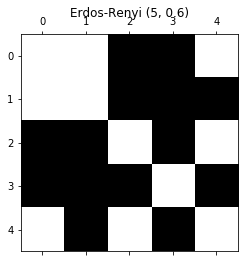

In [8]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

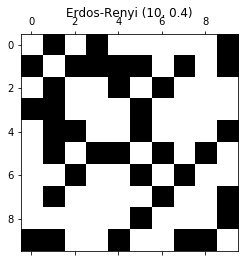

In [9]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [10]:
p = n_edges/(0.5*n_nodes*(n_nodes-1))
er_senator_like = erdos_renyi(n_nodes, p, seed=None)

The random network must have `n_nodes = 100` nodes and the probability of an edge between two note is $p= \frac{|E|}{\frac{1}{2}|N|\dot(|N|-1)} $, where the denuminator is the maximum number of edge that can be in this graph.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [11]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    np.random.seed(seed)
    adjacency = np.ones((m0,m0)) - np.identity(m0)
    
    for ind in np.arange(m0,n):
        #print(np.sum(adjacency))
        dist = np.sum(adjacency, axis=1)
        total_deg = dist.sum()
        dist = dist/total_deg
        #print(adjacency)
        #print(dist)
        node_to_connect = np.random.choice(np.arange(0, ind), m, replace=False, p=dist)
        # print(node_to_connect)
        adj_vect = np.zeros(ind).reshape(1,-1)
        adj_vect[0,node_to_connect] = 1
        #print(adj_vect.shape)
        #print(adjacency.shape)
        adjacency = np.concatenate((adjacency,adj_vect),axis=0)
        adj_vect = np.append(adj_vect,0).reshape(-1,1)
        #print(adj_vect.shape)
        #print(adjacency.shape)
        adjacency = np.concatenate((adjacency,adj_vect),axis=1)
        
        
    
    return adjacency

Text(0.5, 1.05, 'Barabasi-Albert (5, 1)')

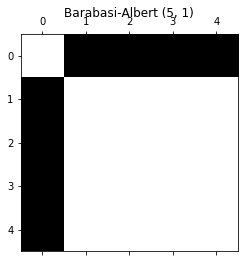

In [12]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5, 1.05, 'Barabasi-Albert (10, 2)')

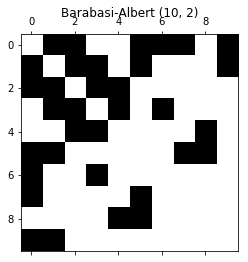

In [13]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

We need to have, in the end, $n = n\_nodes$. The number of links at the end of the generation will be : $ (n-m-1)*m + \frac{m*(m-1)}{2}$ . The first term is due to the node we progressively add and the second one is due to the initialization of the algorithm with a complete graph. Solving for m leads to $ m ~= 26 $ (resulting in 2249 nodes, compared to 2251 in the real network).

Text(0.5, 1.05, 'Barabasi-Albert')

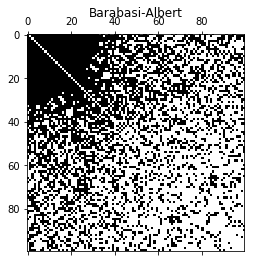

In [14]:
ba_senator_like = barabasi_albert(100, 26, 27, 9087)
plt.spy(ba_senator_like)
plt.title('Barabasi-Albert')

**Your answer here**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [15]:
# Your code here.
print("Edges in the real network : " + str(n_edges))
print("Edges in the Erdős–Rényi network : " + str(np.sum(er_senator_like)/2))
print("Edges in the Barabási-Albert network : " + str(np.sum(ba_senator_like)/2))

Edges in the real network : 2251
Edges in the Erdős–Rényi network : 2219.0
Edges in the Barabási-Albert network : 2249.0


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [16]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    assert p.size <= q.size
    if p.size < q.size:
        p = np.append(p,np.zeros(q.size-p.size))
    if np.where(q == 0)[0].size > 0:
        #assert np.count_nonzero(p[np.where(q == 0)[0]])==0
        if np.count_nonzero(p[np.where(q == 0)[0]])>0:
            return np.NaN
    terms = np.multiply(p,np.log(np.divide(p,q)))
    kl = np.nansum(terms)
    return kl

In [17]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [18]:
# Your code here.
def matrix2BlockDistrib(adjacency,bins):
    p = np.bincount(np.sum(adjacency.astype(int), axis=0))
    p_blocks = np.zeros(len(bins))
    for k in range(0,len(bins)-1):
        for degree in range(bins[k],bins[k+1]):
            p_blocks[k] = p_blocks[k] + p[degree]
    for degree in range(bins[len(bins)-1],len(p)):
        p_blocks[len(bins)-1] = p_blocks[len(bins)-1] + p[degree]
    p_blocks = p_blocks/np.sum(p_blocks)
    return p_blocks


p_real = np.bincount(np.sum(adjacency.astype(int), axis=0))
p_real = p_real/np.sum(p_real)
p_er = np.bincount(np.sum(er_senator_like.astype(int), axis=0))
p_er = p_er/np.sum(p_er)
p_ba = np.bincount(np.sum(ba_senator_like.astype(int), axis=0))
p_ba = p_ba/np.sum(p_ba)

print("The following divergene are computed on a degree-by-degree comparison. They are not defined, most of the time.")
print("The divergence with the Erdős–Rényi is : " + str(kl_divergence(p_real, p_er)))
print("The divergence with the Barabási-Albert is : " + str(kl_divergence(p_real, p_ba)))

print("")
print("")
print("")

print("The following divergene are computed on a bin-by-bin comparison. The bins sued have been adapted to the properties of the degree distribution of our network.")
bins = [0,30,40,45,50]
p_real_block = matrix2BlockDistrib(adjacency,bins)
p_er_block = matrix2BlockDistrib(er_senator_like,bins)
p_ba_block = matrix2BlockDistrib(ba_senator_like,bins)
print("The lower bound of the bins we used are: ")
print(bins)
print("The divergence with the Erdős–Rényi is : " + str(kl_divergence(p_real_block, p_er_block)))
print("The divergence with the Barabási-Albert is : " + str(kl_divergence(p_real_block, p_ba_block)))


The following divergene are computed on a degree-by-degree comparison. They are not defined, most of the time.
The divergence with the Erdős–Rényi is : nan
The divergence with the Barabási-Albert is : nan



The following divergene are computed on a bin-by-bin comparison. The bins sued have been adapted to the properties of the degree distribution of our network.
The lower bound of the bins we used are: 
[0, 30, 40, 45, 50]
The divergence with the Erdős–Rényi is : nan
The divergence with the Barabási-Albert is : 1.8050569725847423


The KL divergence is not defined in the degree-by-degree comparison : the assertion $q(i)=0 => p(i)=0$ does not hold.
We computed a KL divergence based on bins (groups of degrees) to avoid that issue. The bins we defined are based on the degree distribution of our real network : large bins are used for degree poorly represented, and narrow bins are used when the degrees are more represented.

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

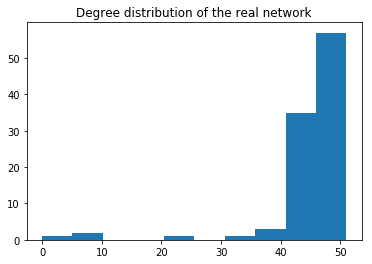

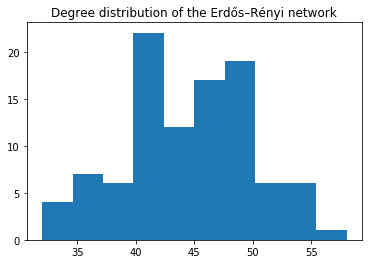

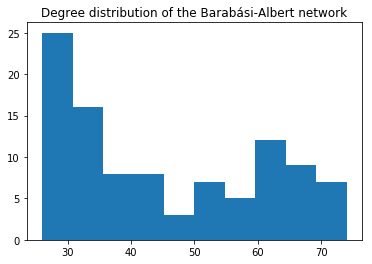

In [19]:
# Your code here.
plt.hist((np.sum(adjacency.astype(int), axis=0)))
plt.title('Degree distribution of the real network')
plt.show()

plt.hist((np.sum(er_senator_like.astype(int), axis=0)))
plt.title('Degree distribution of the Erdős–Rényi network')
plt.show()

plt.hist((np.sum(ba_senator_like.astype(int), axis=0)))
plt.title('Degree distribution of the Barabási-Albert network')
plt.show()

**Your answer here.**
The Erdos-Renyi model appears closer to our network with a low KL-divergence. Indeed, we can see that the repartition of degrees is concentrated between 35 and 50 in the Erdos-Renyi model, which is quite similar to our model. On the other hand, the Barabasi-Albert network gives degrees less concentrated, hence it is further to our network in terms of KL-divergence.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**
No. In the following example, the degree distributions are equal (only "degree 1" nodes) but they are clearly different ! 

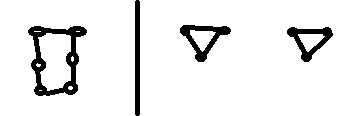

In [20]:
from IPython.display import Image
Image(filename='img/M2Q9.jpg') 

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go
import networkx as nx

In [218]:
import random

def connect(G, ni, nj):
    G[ni, nj] = 1
    G[nj, ni] = 1

def idx_sizes_to_list(arr):
    """ Converts list of sizes of indexes to list i.e (3, 1, 0, 2) to (1, 1, 1, 2, 4, 4)"""
    out = []
    for idx, size in enumerate(arr):
        out += [idx] * size
    return np.array(out)
    
    
def random_community_structure(n_nodes, sizes, degrees, q, seed=1, debug_out=False):
    """
    Creates a random community structure graph.
    Params:
        nodes_n: Number of nodes
        sizes: Communities sizes, also describes number of communities. Must verif. sizes.sum = nodes_n
        degrees: degrees[i] = number of nodes with degree i in graph. Must verif. degrees.sum % 2 = 0
        q: represent the proportion of between-edges out of total edges (1-q : proportion of within-edges)
        seed: randomness seed
    """
    debug = lambda *a, **kwa: print(*a, **kwa) if debug_out else None
    
    assert sizes.sum() == n_nodes, f"Param sizes must sum to {n_nodes}. (Here:{sizes.sum()})"
    assert degrees.sum() % 2  == 0, f"Param degrees must be even. (Here:{degrees.sum()})"
    np.random.seed(seed)
    random.seed(seed)
    
    # Assign n nodes into k groups
    G = np.zeros((n_nodes, n_nodes))
    debug("Graph adj matrix shape:", G.shape)
    
    # Compute communities which maps node_idx to community_idx, shuffled
    n_communities = sizes.shape[0]
    communities = idx_sizes_to_list(sizes)    
    debug('n_communities', n_communities, 'communities', communities)
    np.random.shuffle(communities)
    debug('communities shuffled', communities)
    
    # Compute communities_start_idx which maps community_idx to node_idx0 (starting node index of each com.)
    communities_start_idx = []
    cumulative_size  = 0
    for i in range(n_communities):
        communities_start_idx.append(cumulative_size)
        cumulative_size += sizes[i]
    debug('com_start_idx', communities_start_idx)

    # Compute degr which maps node_idx to node degree, shuffled
    degr = idx_sizes_to_list(degrees)
    debug('degr', degr)
    np.random.shuffle(degr)
    debug('degr shuffled', degr)
    
    # Connect between-edges
    
    n_edges = int(degr.sum() / 2)
    debug('n_edges', n_edges)
    n_between = int(q * n_edges)
    debug('n_between', n_between)
    for _ in range(n_between):
        # Pick two random distinct community
        com_i = random.randint(0, n_communities-1)
        com_j = random.choice([j for j in range(n_communities) if not j == com_i])
        assert not com_i == com_j
        #  Pick one random node of each community
        node_i_cidx = random.randint(0, sizes[com_i]-1)
        node_j_cidx = random.randint(0, sizes[com_j]-1)
        # Compute the two nodes indices
        node_i = communities_start_idx[com_i] + node_i_cidx
        node_j = communities_start_idx[com_j] + node_j_cidx
        debug(f'connecting node {node_i_cidx} of com {com_i}\
    (start {communities_start_idx[com_i]}, size {sizes[com_i]}=>node {node_i})\
    and node {node_j_cidx} of com {com_j}\
    (start {communities_start_idx[com_j]}, size {sizes[com_j]}=>node {node_j})')
        # Connect our two nodes with a between-edge
        connect(G, node_i, node_j)
    
    # Connect within-edges
    n_within = int(n_edges - n_between)
    debug('n_within', n_within)
    for _ in range(n_within):
        # Pick a random community
        com = random.randint(0, n_communities-1)
        # Pick two distinct nodes in the community
        node_i_cidx = random.randint(0, sizes[com]-1)
        node_j_cidx = random.choice([j for j in range(sizes[com]) if not j == node_i_cidx])
        assert not node_i_cidx == node_j_cidx
        # Compute the two nodes indices
        node_i = communities_start_idx[com] + node_i_cidx
        node_j = communities_start_idx[com] + node_j_cidx
        debug(f'connecting node {node_i_cidx} of com {com}\
    (start {communities_start_idx[com_i]}, size {sizes[com_i]}=>node {node_i})\
    and node {node_j_cidx} of com {com}\
    (start {communities_start_idx[com_j]}, size {sizes[com_j]}=>node {node_j})')
        connect(G, node_i, node_j)
        
    return G

#rcs = random_community_structure(15, np.array([3, 4, 6, 2]), np.array([2, 3, 6, 8, 6, 3, 2]), .5)
#print(rcs)

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [221]:

degrees_raw = np.sum(adjacency.astype(int), axis=0)
degrees_cumul = np.zeros(degrees_raw.max()+1, dtype=int)

unique, counts = np.unique(degrees_raw, return_counts=True)
for degree, count in dict(zip(unique, counts)).items():
    degrees_cumul[degree] = count
print(degrees_cumul)
    
# Use debug_out =  
rand_G = random_community_structure(100, np.array([50,50]), degrees_cumul, 0.2, debug_out=False)
print(rand_G)

[ 1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1
  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  2  1  5  2  3  2 23  7  2
  1 43  3  1]
Graph adj matrix shape: (100, 100)
n_communities 2 communities [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
communities shuffled [1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]
com_start_idx [0, 50]
degr [ 0  6 10 23 32 39 39 40 41 41 41 41 41 42 42 43 43 43 44 44 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 46 46 46 46 46
 46 46 47 47 48 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49
 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49 49
 50 50 50 51]
degr shuffled [

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [64]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**